In [97]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
import math

from plotting_utils import set_fontsize, render_in_latex, get_project_runs, filter_runs, plot_runs, plot_runs_grid

In [99]:
runs = get_project_runs("sketchy-opts", "performance_inducing_krr_cifar10")

In [100]:
criteria1 = {
    "optimizer": lambda run: run.config["opt"] == "askotchv2",
    "accelerated": lambda run: run.config["accelerated"],
    "preconditioned": lambda run: run.config["precond_params"] is not None,
    "sampling": lambda run: run.config["sampling_method"] == "uniform",
    "finished": lambda run: run.state == "finished",
}
criteria2 = {
    "optimizer": lambda run: run.config["opt"] == "pcg",
    "precision": lambda run: run.config["precision"] == "float64",
    "finished": lambda run: run.state == "finished",
}

In [101]:
# datasets = {
#     "cifar10": {
#         "ylim1": [0.6, 1.0],
#         "ylim2": [0.6, 1.0],
#         "metric": "test_acc",
#     },
#     "fashion_mnist": {
#         "ylim1": [0.6, 1.0],
#         "ylim2": [0.6, 1.0],
#         "metric": "test_acc",
#     },
#     "mnist": {
#         "ylim1": [0.6, 1.0],
#         "ylim2": [0.6, 1.0],
#         "metric": "test_acc",
#     },
#     "svhn": {
#         "ylim1": [0.6, 1.0],
#         "ylim2": [0.6, 1.0],
#         "metric": "test_acc",
#     },
# }
# datasets = {
#     "miniboone": {
#         "ylim1": [0.6, 1.0],
#         "ylim2": [0.6, 1.0],
#         "metric": "test_acc",
#     },
#     "susy": {
#         "ylim1": [0.6, 0.9],
#         "ylim2": [0.6, 0.9],
#         "metric": "test_acc",
#     },
#     "higgs": {
#         "ylim1": [0.5, 0.8],
#         "ylim2": [0.5, 0.8],
#         "metric": "test_acc",
#     },
# }
datasets = {
    "covtype_binary": {
        "ylim1": [0.0, 1.0],
        "ylim2": [0.0, 1.0],
        "metric": "test_acc",
    },
    "comet_mc": {
        "ylim1": [0.4, 1.0],
        "ylim2": [0.4, 1.0],
        "metric": "test_acc",
    },
    "click_prediction": {
        "ylim1": [0.4, 0.9],
        "ylim2": [0.4, 0.9],
        "metric": "test_acc",
    },
}
# datasets = {
#     "qm9": {
#         "ylim1": [0.0, 2.0],
#         "ylim2": [0.0, 2.0],
#         "metric": "test_smape",
#     }
# # }
# datasets = {
#     "toluene": {
#         "ylim1": [0.0, 2.0],
#         "ylim2": [0.0, 2.0],
#         "metric": "test_smape",
#     },
#     "ethanol": {
#         "ylim1": [0.0, 2.0],
#         "ylim2": [0.0, 2.0],
#         "metric": "test_smape",
#     },
#     "benzene": {
#         "ylim1": [0.0, 2.0],
#         "ylim2": [0.0, 2.0],
#         "metric": "test_smape",
#     },
#     "malonaldehyde": {
#         "ylim1": [0.0, 2.0],
#         "ylim2": [0.0, 2.0],
#         "metric": "test_smape",
#     }
# }
# }
datasets = {
    "yearpredictionmsd": {
        "ylim1": [1.5e2, 1e3],
        "ylim2": [1.5e2, 1e3],
        "metric": "test_rmse",
    },
    "acsincome": {
        "ylim1": [4e4, 6e4],
        "ylim2": [4e4, 6e4],
        "metric": "test_rmse",
    },
    "airlines": {
        "ylim1": [1.3, 1.5],
        "ylim2": [1.3, 1.5],
        "metric": "test_rmse",
    },
}

fontsize = 14
entity_name = "sketchy-opts"

x_axis = "time"
hparams_to_label = {
    "askotchv2": ["precond", "r", "sampling_method"],
    "pcg": ["precond", "r", "m"]
}

In [102]:
set_fontsize(fontsize)

# # Render plots in LaTeX
# render_in_latex()

In [103]:
def plot_runs_dataset_grid(entity_name, dataset_configs, criteria1, criteria2, hparams_to_label, x_axis):
    entity_name = "sketchy-opts"
    save_dir = f"./plots/testing"
    extension = ".pdf"

    run_lists = []
    metrics = []
    ylims = []
    titles = []

    n_cols = 2
    n_rows = math.ceil(len(dataset_configs) / n_cols)

    for dataset, config in dataset_configs.items():
        project_name_full_krr = f"performance_full_krr_{dataset}"
        project_name_inducing_krr = f"performance_inducing_krr_{dataset}"
        runs_full_krr = get_project_runs(entity_name, project_name_full_krr)
        runs_inducing_krr = get_project_runs(entity_name, project_name_inducing_krr)
        runs_filtered1 = filter_runs(runs_full_krr, criteria1)
        runs_filtered2 = filter_runs(runs_full_krr, criteria2)
        runs_filtered3 = filter_runs(runs_inducing_krr, criteria2)

        run_lists.append(runs_filtered1 + runs_filtered2 + runs_filtered3)
        metrics.append(config["metric"])
        ylims.append(config["ylim2"])
        titles.append(dataset)
        
    plot_runs_grid(run_lists, hparams_to_label, metrics, x_axis, ylims, titles, n_cols, n_rows, save_dir, f"askotch_vs_pcg_grid{extension}")

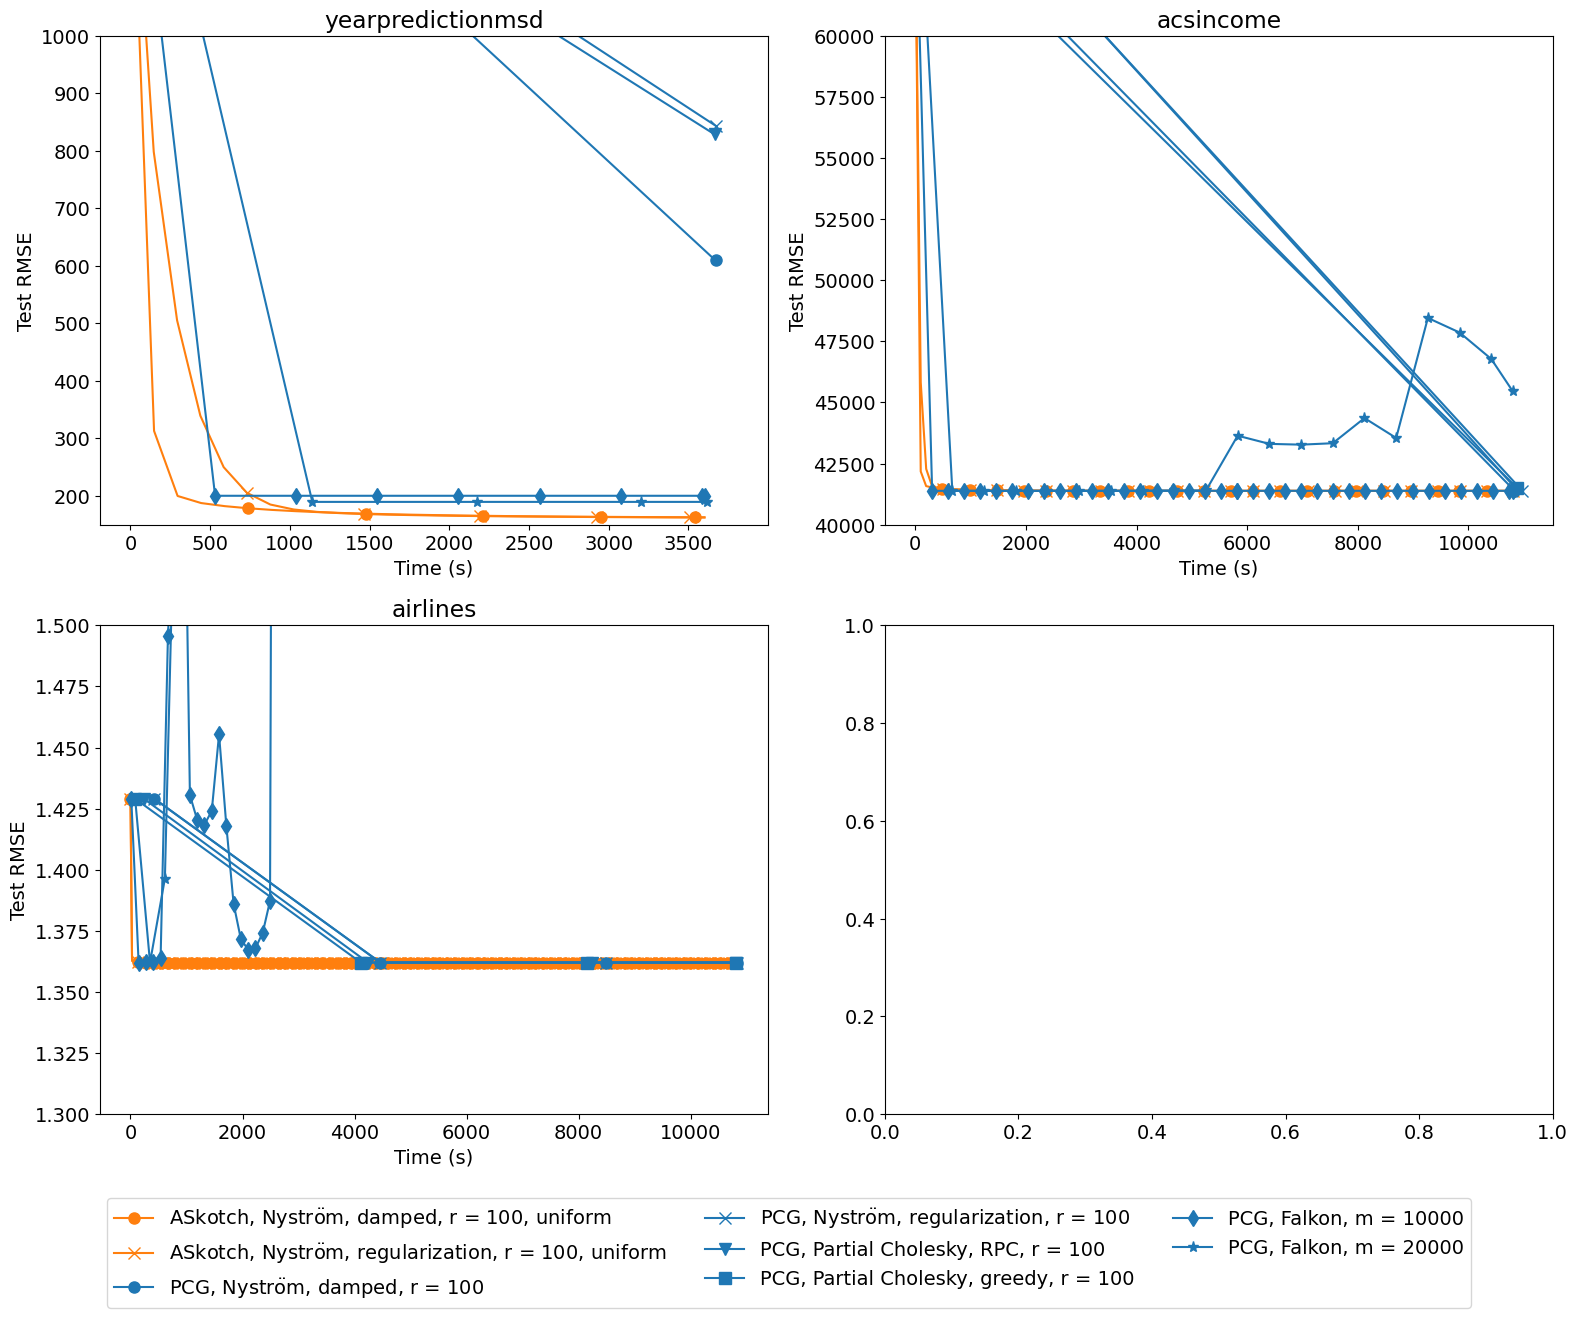

In [104]:
plot_runs_dataset_grid(entity_name, datasets, criteria1, criteria2, hparams_to_label, x_axis)